<a href="https://colab.research.google.com/github/baylsan20/bella-cloud/blob/main/CAFE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
df=pd.read_csv('dirty_cafe_sales.csv')
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_9226047,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [5]:
df_clean=df.copy()
df_clean['Total Spent'] = pd.to_numeric(df_clean['Total Spent'], errors='coerce')
df_clean['Total Spent'].dtype
df_clean['Price Per Unit']=pd.to_numeric(df_clean['Price Per Unit'],errors='coerce')
df_clean['Price Per Unit'].dtype
df_clean['Quantity']=pd.to_numeric(df_clean['Quantity'],errors='coerce')
df_clean['Quantity'].dtype
df_clean['Transaction Date']=pd.to_datetime(df_clean['Transaction Date'],errors='coerce')
df_clean['Transaction Date'].dtype
df_clean['Transaction Date'].dtype
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    10000 non-null  object        
 1   Item              9667 non-null   object        
 2   Quantity          9521 non-null   float64       
 3   Price Per Unit    9467 non-null   float64       
 4   Total Spent       9498 non-null   float64       
 5   Payment Method    7421 non-null   object        
 6   Location          6735 non-null   object        
 7   Transaction Date  9540 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 625.1+ KB


In [6]:
df_clean.isnull().sum()

,0
Transaction ID,0
Item,333
Quantity,479
Price Per Unit,533
Total Spent,502
Payment Method,2579
Location,3265
Transaction Date,460


In [7]:
df_clean=df_clean.dropna(subset=['Item','Quantity', 'Transaction Date'])
print(len(df_clean))


8788


In [8]:
df_clean['Price Per Unit']=df_clean['Price Per Unit'].fillna(df_clean['Price Per Unit'].mean())
df_clean['Total Spent']=df_clean['Total Spent'].fillna(df_clean['Total Spent'].mean())


In [9]:
df_clean['Payment Method']=df_clean['Payment Method'].fillna('UnKnown')
df_clean['Location']=df_clean['Location'].fillna('Unknown')

In [10]:
df_clean.isnull().sum()


,0
Transaction ID,0
Item,0
Quantity,0
Price Per Unit,0
Total Spent,0
Payment Method,0
Location,0
Transaction Date,0


In [11]:
df_clean['Item']=df_clean['Item'].replace('ERROR','Unknown')
df_clean['Payment Method']=df_clean['Payment Method'].replace('ERROR','Unknown')
df_clean['Location']=df_clean['Location'].replace('ERROR','Unknown')

In [12]:
for col in df_clean.columns:
    errors = df_clean[df_clean[col] == 'ERROR'][col].count()
    if errors > 0:
        print(f'{col}: {errors} errors')

In [13]:
df_clean.to_csv('clean_cafe_sales.csv',index=False)
print('تم الحفظ بنجااح ')

تم الحفظ بنجااح 


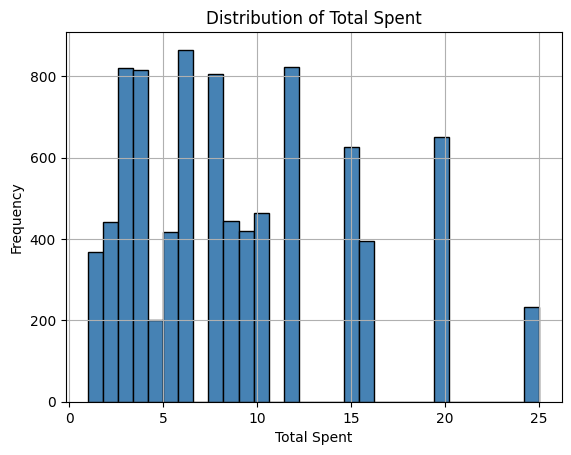

In [14]:
import matplotlib.pyplot as plt

df_clean['Total Spent'].hist(bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

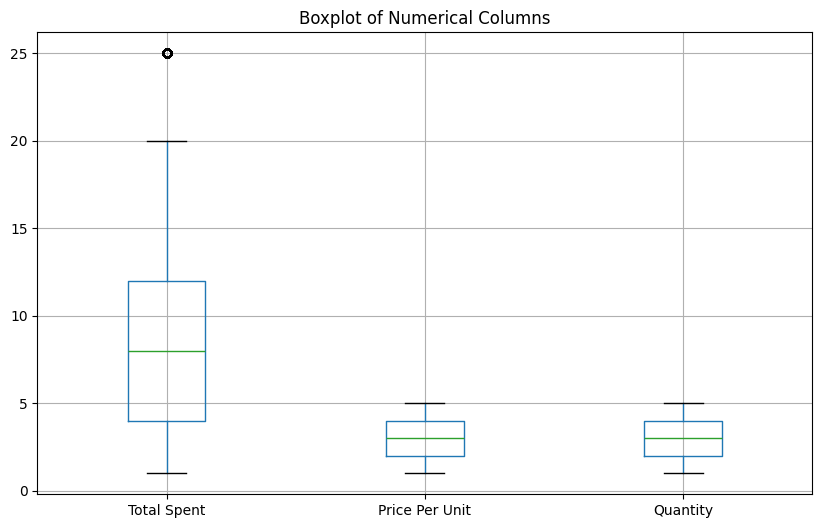

In [15]:
df_clean.boxplot(column=['Total Spent', 'Price Per Unit', 'Quantity'], figsize=(10,6))
plt.title('Boxplot of Numerical Columns')
plt.show()

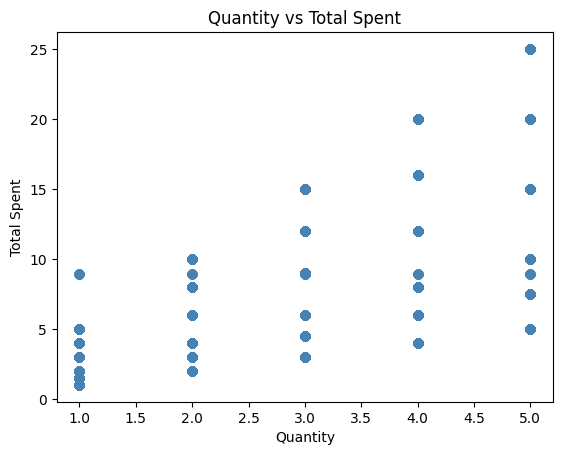

In [16]:
plt.scatter(df_clean['Quantity'], df_clean['Total Spent'], alpha=0.5, color='steelblue')
plt.title('Quantity vs Total Spent')
plt.xlabel('Quantity')
plt.ylabel('Total Spent')
plt.show()

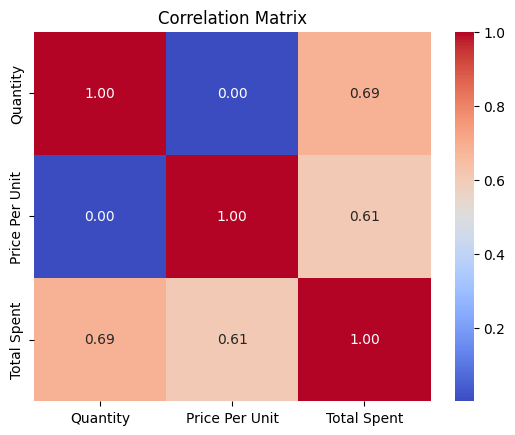

In [17]:
import seaborn as sns

correlation = df_clean[['Quantity', 'Price Per Unit', 'Total Spent']].corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

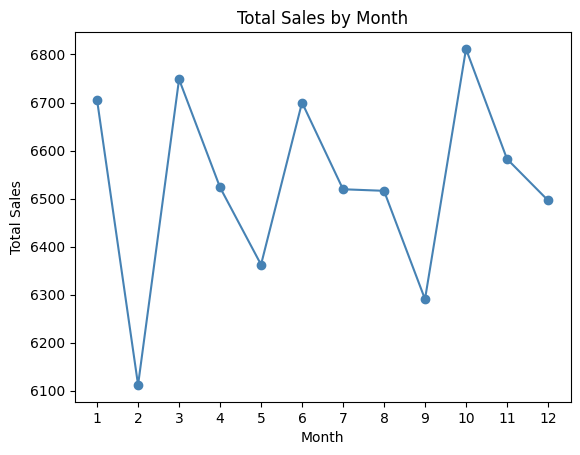

In [34]:
df_clean.groupby('Month')['Total Spent'].sum().plot(kind='line', color='steelblue', marker='o')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.show()

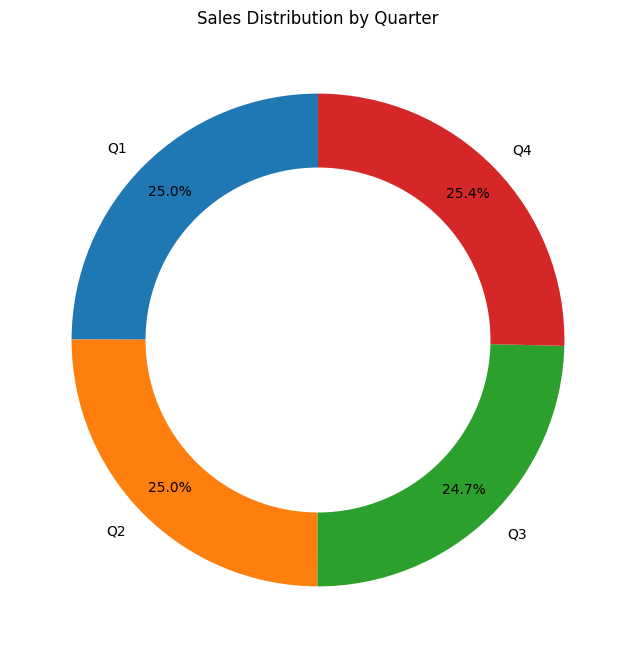

In [39]:
quarter_sales = df_clean.groupby('Quarter')['Total Spent'].sum()

plt.figure(figsize=(8,8))
plt.pie(quarter_sales,
        labels=['Q1','Q2','Q3','Q4'],
        autopct='%1.1f%%',
        pctdistance=0.85,
        startangle=90)
centre_circle = plt.Circle((0,0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)
plt.title('Sales Distribution by Quarter')
plt.show()

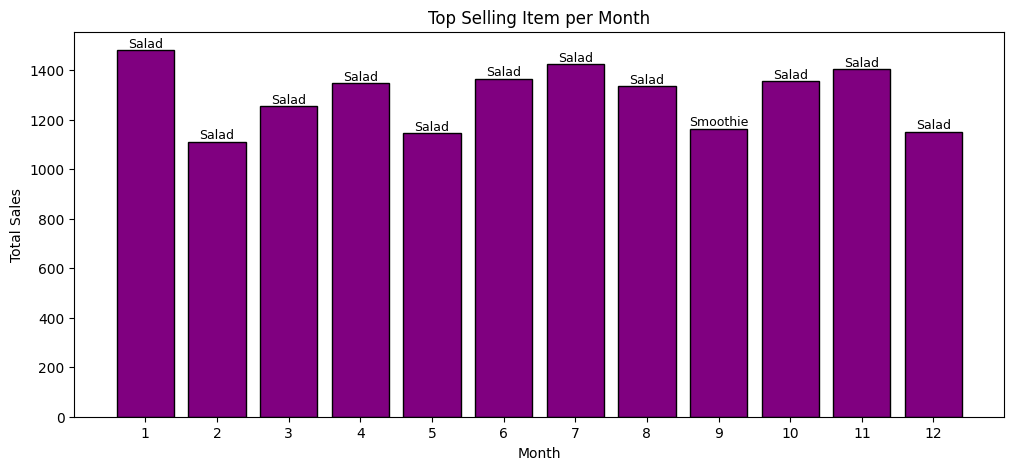

In [30]:
best_item = df_clean[df_clean['Item'] != 'Unknown'].groupby(['Month', 'Item'])['Total Spent'].sum().reset_index()
best_item = best_item.loc[best_item.groupby('Month')['Total Spent'].idxmax()]

plt.figure(figsize=(12,5))
plt.bar(best_item['Month'], best_item['Total Spent'], color='purple', edgecolor='black')
for i, row in best_item.iterrows():
    plt.text(row['Month'], row['Total Spent'], row['Item'], ha='center', va='bottom', fontsize=9)
plt.title('Top Selling Item per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1,13))
plt.show()

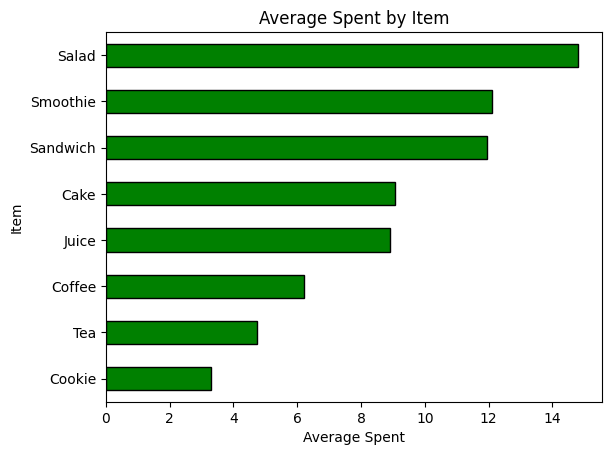

In [35]:
df_clean[df_clean['Item'] != 'Unknown'].groupby('Item')['Total Spent'].mean().sort_values().plot(kind='barh', color='green', edgecolor='black')
plt.title('Average Spent by Item')
plt.xlabel('Average Spent')
plt.ylabel('Item')
plt.show()

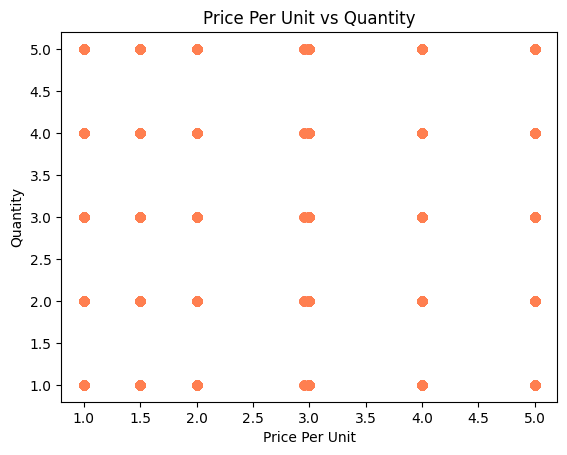

In [32]:
plt.scatter(df_clean['Price Per Unit'], df_clean['Quantity'], alpha=0.5, color='coral')
plt.title('Price Per Unit vs Quantity')
plt.xlabel('Price Per Unit')
plt.ylabel('Quantity')
plt.show()

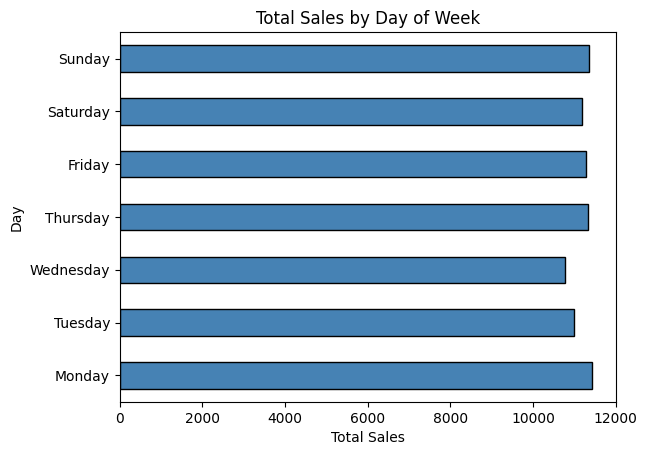

In [36]:
df_clean.groupby('Day')['Total Spent'].sum().reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot(kind='barh', color='steelblue', edgecolor='black')
plt.title('Total Sales by Day of Week')
plt.xlabel('Total Sales')
plt.ylabel('Day')
plt.show()